# Subject: Classical Data Analysis

## Session 1 - Regression

### Individual assignment 2 Solution

Elaborate with only the first feature of the "iris" sklearn dataset, in order to illustrate a two-dimensional plot of this regression technique. 

Use the field “sepal width (cm)” as independent variable and the field “sepal length (cm)” as dependent variable.

Calculate the coefficients, the residual sum of squares and the variance score.

- Interpret and discuss the Regression Results.
- Commit scripts in your GitHub account. You should export your solution code (.ipynb notebook) and push it to your repository “ClassicalDataAnalysis”.

The following are the tasks that should complete and synchronize with your repository “ClassicalDataAnalysis” until October 13. Please notice that none of these tasks is graded, however it’s important that you correctly understand and complete them in order to be sure that you won’t have problems with further assignments.

# Import the Python Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the iris dataset

In [2]:
iris = datasets.load_iris()

In [3]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [7]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

# Use only one feature for the dependent variable (sepal length (cm))

In [8]:
iris_y = iris.data[:, np.newaxis, 0] # The newaxis object can be used in all slicing operations to create an axis of length one. The number 2 refers to the field "sepal length (cm)"

In [9]:
iris_y

array([[ 5.1],
       [ 4.9],
       [ 4.7],
       [ 4.6],
       [ 5. ],
       [ 5.4],
       [ 4.6],
       [ 5. ],
       [ 4.4],
       [ 4.9],
       [ 5.4],
       [ 4.8],
       [ 4.8],
       [ 4.3],
       [ 5.8],
       [ 5.7],
       [ 5.4],
       [ 5.1],
       [ 5.7],
       [ 5.1],
       [ 5.4],
       [ 5.1],
       [ 4.6],
       [ 5.1],
       [ 4.8],
       [ 5. ],
       [ 5. ],
       [ 5.2],
       [ 5.2],
       [ 4.7],
       [ 4.8],
       [ 5.4],
       [ 5.2],
       [ 5.5],
       [ 4.9],
       [ 5. ],
       [ 5.5],
       [ 4.9],
       [ 4.4],
       [ 5.1],
       [ 5. ],
       [ 4.5],
       [ 4.4],
       [ 5. ],
       [ 5.1],
       [ 4.8],
       [ 5.1],
       [ 4.6],
       [ 5.3],
       [ 5. ],
       [ 7. ],
       [ 6.4],
       [ 6.9],
       [ 5.5],
       [ 6.5],
       [ 5.7],
       [ 6.3],
       [ 4.9],
       [ 6.6],
       [ 5.2],
       [ 5. ],
       [ 5.9],
       [ 6. ],
       [ 6.1],
       [ 5.6],
       [ 6.7],
       [ 5

# Split the data of the dependent variable into training/testing sets

In [10]:
iris_y_train = iris_y[:-20]
iris_y_test = iris_y[-20:]

In [11]:
iris_y_train

array([[ 5.1],
       [ 4.9],
       [ 4.7],
       [ 4.6],
       [ 5. ],
       [ 5.4],
       [ 4.6],
       [ 5. ],
       [ 4.4],
       [ 4.9],
       [ 5.4],
       [ 4.8],
       [ 4.8],
       [ 4.3],
       [ 5.8],
       [ 5.7],
       [ 5.4],
       [ 5.1],
       [ 5.7],
       [ 5.1],
       [ 5.4],
       [ 5.1],
       [ 4.6],
       [ 5.1],
       [ 4.8],
       [ 5. ],
       [ 5. ],
       [ 5.2],
       [ 5.2],
       [ 4.7],
       [ 4.8],
       [ 5.4],
       [ 5.2],
       [ 5.5],
       [ 4.9],
       [ 5. ],
       [ 5.5],
       [ 4.9],
       [ 4.4],
       [ 5.1],
       [ 5. ],
       [ 4.5],
       [ 4.4],
       [ 5. ],
       [ 5.1],
       [ 4.8],
       [ 5.1],
       [ 4.6],
       [ 5.3],
       [ 5. ],
       [ 7. ],
       [ 6.4],
       [ 6.9],
       [ 5.5],
       [ 6.5],
       [ 5.7],
       [ 6.3],
       [ 4.9],
       [ 6.6],
       [ 5.2],
       [ 5. ],
       [ 5.9],
       [ 6. ],
       [ 6.1],
       [ 5.6],
       [ 6.7],
       [ 5

In [12]:
iris_y_test

array([[ 7.4],
       [ 7.9],
       [ 6.4],
       [ 6.3],
       [ 6.1],
       [ 7.7],
       [ 6.3],
       [ 6.4],
       [ 6. ],
       [ 6.9],
       [ 6.7],
       [ 6.9],
       [ 5.8],
       [ 6.8],
       [ 6.7],
       [ 6.7],
       [ 6.3],
       [ 6.5],
       [ 6.2],
       [ 5.9]])

# Use only one feature for the independent variable (sepal width (cm))

In [13]:
iris_X = iris.data[:, np.newaxis, 1] # The newaxis object can be used in all slicing operations to create an axis of length one. The number 3 refers to the field "sepal width (cm))"

In [14]:
iris_X

array([[ 3.5],
       [ 3. ],
       [ 3.2],
       [ 3.1],
       [ 3.6],
       [ 3.9],
       [ 3.4],
       [ 3.4],
       [ 2.9],
       [ 3.1],
       [ 3.7],
       [ 3.4],
       [ 3. ],
       [ 3. ],
       [ 4. ],
       [ 4.4],
       [ 3.9],
       [ 3.5],
       [ 3.8],
       [ 3.8],
       [ 3.4],
       [ 3.7],
       [ 3.6],
       [ 3.3],
       [ 3.4],
       [ 3. ],
       [ 3.4],
       [ 3.5],
       [ 3.4],
       [ 3.2],
       [ 3.1],
       [ 3.4],
       [ 4.1],
       [ 4.2],
       [ 3.1],
       [ 3.2],
       [ 3.5],
       [ 3.1],
       [ 3. ],
       [ 3.4],
       [ 3.5],
       [ 2.3],
       [ 3.2],
       [ 3.5],
       [ 3.8],
       [ 3. ],
       [ 3.8],
       [ 3.2],
       [ 3.7],
       [ 3.3],
       [ 3.2],
       [ 3.2],
       [ 3.1],
       [ 2.3],
       [ 2.8],
       [ 2.8],
       [ 3.3],
       [ 2.4],
       [ 2.9],
       [ 2.7],
       [ 2. ],
       [ 3. ],
       [ 2.2],
       [ 2.9],
       [ 2.9],
       [ 3.1],
       [ 3

# Split the data of the independent variable into training/testing sets

In [15]:
iris_X_train = iris_X[:-20]
iris_X_test = iris_X[-20:]

In [16]:
iris_y_train

array([[ 5.1],
       [ 4.9],
       [ 4.7],
       [ 4.6],
       [ 5. ],
       [ 5.4],
       [ 4.6],
       [ 5. ],
       [ 4.4],
       [ 4.9],
       [ 5.4],
       [ 4.8],
       [ 4.8],
       [ 4.3],
       [ 5.8],
       [ 5.7],
       [ 5.4],
       [ 5.1],
       [ 5.7],
       [ 5.1],
       [ 5.4],
       [ 5.1],
       [ 4.6],
       [ 5.1],
       [ 4.8],
       [ 5. ],
       [ 5. ],
       [ 5.2],
       [ 5.2],
       [ 4.7],
       [ 4.8],
       [ 5.4],
       [ 5.2],
       [ 5.5],
       [ 4.9],
       [ 5. ],
       [ 5.5],
       [ 4.9],
       [ 4.4],
       [ 5.1],
       [ 5. ],
       [ 4.5],
       [ 4.4],
       [ 5. ],
       [ 5.1],
       [ 4.8],
       [ 5.1],
       [ 4.6],
       [ 5.3],
       [ 5. ],
       [ 7. ],
       [ 6.4],
       [ 6.9],
       [ 5.5],
       [ 6.5],
       [ 5.7],
       [ 6.3],
       [ 4.9],
       [ 6.6],
       [ 5.2],
       [ 5. ],
       [ 5.9],
       [ 6. ],
       [ 6.1],
       [ 5.6],
       [ 6.7],
       [ 5

In [17]:
iris_y_test

array([[ 7.4],
       [ 7.9],
       [ 6.4],
       [ 6.3],
       [ 6.1],
       [ 7.7],
       [ 6.3],
       [ 6.4],
       [ 6. ],
       [ 6.9],
       [ 6.7],
       [ 6.9],
       [ 5.8],
       [ 6.8],
       [ 6.7],
       [ 6.7],
       [ 6.3],
       [ 6.5],
       [ 6.2],
       [ 5.9]])

# Create linear regression object

In [18]:
regr = linear_model.LinearRegression()

# Train the model using the training sets

In [19]:
regr.fit(iris_X_train, iris_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Make predictions using the testing set

In [20]:
iris_y_pred = regr.predict(iris_X_test)

# The coefficients

In [21]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[-0.26389832]]


# The mean squared error

In [22]:
print("Mean squared error: %.2f"
      % mean_squared_error(iris_y_test, iris_y_pred))

Mean squared error: 1.09


# Explained variance score: 1 is perfect prediction

In [23]:
print('Variance score: %.2f' % r2_score(iris_y_test, iris_y_pred))

Variance score: -2.60


# Plot the Regression Line

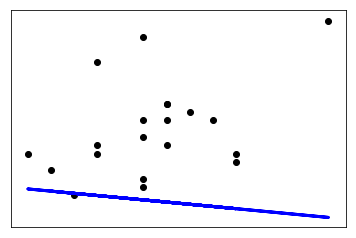

In [24]:
# Plot outputs
plt.scatter(iris_X_test, iris_y_test,  color='black')
plt.plot(iris_X_test, iris_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()